# Intro to Scientific Computing

## Project 1


DATE: May 27, 2016

### Assignment Description for Projects:

In the last portion of this class we'll have two "project" assignments. These are like your homework assignments in that you'll work on python codes within the notebook. They're a little different in their goal. I will start you off with some concrete steps and then suggest options for extension. I would like you, in your groups, to decide which of these to pursue, to document your intentions and your work, and to show your results. 

To make this more concrete, these assignments are programming versions of your lab reports in other classes:

*B*-level work on a project would sucessfully impliment all of the main parts of question 1 -- like on a homework assignment.

*A*-level work would involve a more in-depth exploration of one of the pathways for extension, would describe the motivation and results in detail (in markdown cells) and would show a plot/summary of the findings. 

In [40]:
from numpy import *
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
from astropy.table import Table


# Simulating Gravitational Dynamics with Ordinary Differential Equations


## 1) Orbital motion in the solar system

Lets set up the expressions for the orbital motion of a planet in our solar system.  Planets orbit under the gravitational influence of the sun, in vector form, we can write this down as

$\Large \vec{a} = -\frac{G M_\odot}{r^3}\vec{r}$ 

The first step to break this down is to re-write the acceleration:

$\Large \vec{a} = \frac{d^2 \vec{r} }{d t^2}$

In other words, it's the second derivative of the position $\vec{r}$.  So we can re-write our equation as 

$\Large \frac{d^2 \vec{r} }{d t^2} = -\frac{G M_\odot}{r^3}\vec{r}$

In order to solve this 2nd order differential equation numerically, we need to re-write it as two first order equations. 

$\Large \frac{d \vec{r}}{dt} = \vec{v}$

$\Large \frac{d \vec{v}}{dt} = -\frac{G M_\odot}{r^3}\vec{r}$

BUT, there are still vectors, what do we do with those?!
The idea is that $\vec{r} = (x,y)$ and $\vec{v} = (v_x,v_y)$.  So really, we have four equations for each of these components of the vectors:

$\Large \frac{d x}{dt} = v_x$

$\Large \frac{d y}{dt} = v_y$

$\Large \frac{d v_x}{dt} = -\frac{G M_\odot}{r^3} x$

$\Large \frac{d v_y}{dt} = -\frac{G M_\odot}{r^3} y$

In the cells below, lets try to assemble the 'derivs' function for this set of coupled first-order differential equations.

### a) Plotting Orbits 

Go back to your work on HW 2 (you can also compare to the solution set on ecommons) and remind yourself of the formulae for the minimum and maximum distance to a planet. Re-create the plot of the orbit of planet 9 in this notebook. We'll want to plot your numerical version on top of it. 



### b) Derivs Function

Define a derivatives function based on the expressions above. There should be 4 variables $(x,y,v_x,v_y)$ and four corresponding derivatives. Define $G=6.67\times10^{-8}$ cm$^3$ g$^{-1}$ s$^{-2}$ , $M_\odot=1.989\times10^{33}$ grams as constants inside your function.  

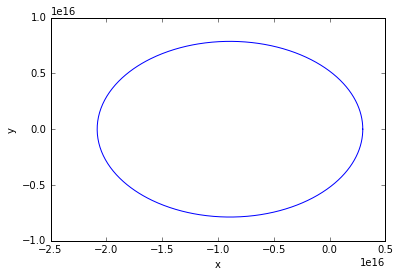

In [62]:
f = linspace(0.,2.*pi,1000.)
def planet_r(f,a,e):
    r = ( a * ( 1. -e**2 )) / (1. + e * cos(f) )
    return r

xpos = planet_r(f,1.19e16,0.75)*cos(f) #planet r we will compare to our numerical version
ypos = planet_r(f,1.19e16,0.75)*sin(f)

axis('equal')

plot (xpos,ypos)
xlabel("x")
ylabel("y")

In [11]:
# Dedfined constants
    G = 6.67e-8
    M = 1.989e33

def orbital_derivs(vec):   
    
    x = vec[0]
    y = vec[1]
    vx = vec[2]
    vy = vec[3]
    
    #total velocity magnitude
    v = sqrt(vx**2 + vy**2)
    r = sqrt(x**2 + y**2)
    
    dxdt = vx
    dydt = vy
    dvxdt = (((-G * M))/(r**3))*x
    dvydt = (((-G * M))/(r**3))*y
    
    derivarray =  array([dxdt,dydt,dvxdt,dvydt])
    
    return derivarray

        x                 y               vx             vy            t       
----------------- ----------------- -------------- ------------- --------------
       2.0825e+16               0.0            0.0 39907.8019072            0.0
2.08248628215e+16 3.77936840101e+13 -289.703780317 39907.5390251  947027027.027
2.08244512839e+16 7.55868701011e+13 -579.412331562 39906.7503592  1894054054.05
2.08237653802e+16 1.13379060316e+14  -869.13042508 39905.4358495  2841081081.08
2.08228050994e+16 1.51169756624e+14 -1158.86283305 39903.5953965  3788108108.11
2.08215704254e+16 1.88958460877e+14 -1448.61432892 39901.2288607  4735135135.14
 2.0820061338e+16 2.26744674781e+14 -1738.38968778 39898.3360629  5682162162.16
2.08182778123e+16  2.6452789985e+14 -2028.19368685 39894.9167836  6629189189.19
 2.0816219819e+16 3.02307637373e+14 -2318.03110582 39890.9707638  7576216216.22
 2.0813887324e+16 3.40083388372e+14 -2607.90672735  39886.497704  8523243243.24
              ...               ...     

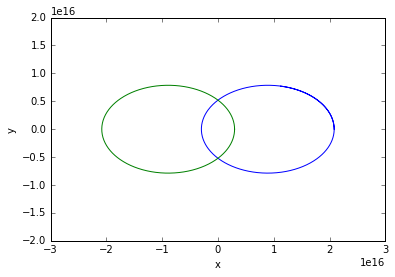

In [63]:
nsteps = 1000 # we tried 100, 300, then 1000
# How many are needed to generate an orbit to match analytic plot

G = 6.67e-8
M = 1.989e33
a = 1.19e16
e = 0.75
rmax = (a*(1. + e))
vy = sqrt(G*M*((2/rmax)-(1/a)))

x0 = rmax
y0 = 0.0
vx0 = 0.0
vy0 = vy 

#specify initial values
initialvalues = array([x0,y0,vx0,vy0])

#specify a set of times to find the solution
times = linspace(0,9.4608e11,nsteps)

#time increment, dt
dt = times[1]-times[0]

#blank 2D array to fill with our solution
result = zeros( (len(times), len(initialvalues) ) )

pos_array = initialvalues.copy()
for i,t in enumerate(times):
    
    #first fill the result array
    result[i]  = pos_array
     
    #advance using runge kitta 
    k1 = dt*orbital_derivs(pos_array)
    k2 = dt*orbital_derivs(pos_array + k1/2.0)
    k3 = dt*orbital_derivs(pos_array + k2/2.0)
    k4 = dt*orbital_derivs(pos_array + k3)
    
    pos_array += k1/6. + k2/3. + k3/3. + k4/6.
    
#converts the solution into a table so we can see column names
colums = ['x','y','vx','vy']
sol = Table(result,names=colums)

#add times column
sol['t'] = times

print sol 

#plots our numerical solution
plot(sol['x'],sol['y'])
plot (xpos,ypos)

axis('equal')

xlabel("x")
ylabel("y")

### c) Setup and Integrate

Using the 4th Order Runge Kutta approach we built in class, integrate the orbit of our hypothetical "planet 9" over at least one orbit. **MAKE A PLOT (with points) showing your result compared to the analytic version. ** 
- Integrate from $t=0$ to $t=30,000$ years (convert this to seconds). 
- Define initial conditions at the point of maximum distance from the sun, in the $-x$ direction (see HW 2). Remember that we used $a = 800$ AU $= 1.19\times 10^{16}$ cm and eccentricity $e=0.75$. Use those same parameters here. 
$$
r_{\rm max} = a(1+e)
$$

- The velocity at this point will all be directed in the $+y$-direction, with magnitude 
$$
v_y = \sqrt{G M_\odot \left( {2 \over r_{\rm max}} - {1 \over a} \right) }.
$$

- Try taking 100 steps, then 300, then 1000. How many are needed to generate an orbit that matches your analytic plot? 

#### Hint: A Strategy

In order to complete this problem, cut and past the soccer ball code we worked with in class. 

- Replace all calls to the derivatives function with your new planetary-motion derivatives. 

- Change the initial conditions to be consistent with the position and velocity of planet 9 at the far point in its orbit. 

- Change the total time span (in the times array) to include enough total time for the planet to complete its orbit (in seconds). 

### d) Describe your results

Make a markdown cell and use it to describe the results of your work. Some topics you could touch on include: How did you modify the code to get it to work? How many integration steps are needed to obtain a good result? What does the orbit look like when the integration goes poorly? When it goes well? How can we evaluate the results of numerical integration?

Throughout the course, we have developed various techniques we applied to this project. As early as Homework #2 we explored the orbit using "Planet 9." We showed the planet's orbit under the gravitational influence of the sun and broke up the 2nd order differential equation as two first order equations. This allowed us to further break them up into components. We then used the "deriv" function, closely comparing it to our class notes (19-20) for the projectile motion with drag: soccer ball. We changed the values to the appropriate velocity magnitudes and adjusted the derivatives. Using these parameters, we set up the expressions for the orbital motion of a planet. We assumed a circular orbit 

for the planet and used the Runge Kutta approach. We compared the plot of the orbit of the planet we found analytically to the numerical version.  At first, we tried 100 integration steps, then 300 steps, then 1000 steps. The best results were given by 1000 integration steps. This is because when there is not sufficient data, the integration is not as precise as it could be with more steps. 

# Ideas For Extension 

Either pick and pursue one of these ideas for extension or discuss your own idea to build on what we have above with me. 



## 2 a) Red Dwarf Falls through the Solar System

For our second problem, construct a simulation of a Red Dwarf passing through the solar system. The simulation should have the following characteristics:

(0) Assume that the 0.1 solar mass Red Dwarf enters the solar system at a distance x=5AU, y=1AU, vx=-15km/s, vy=0km/s relative to the Sun. Assume that the Earth is on its current (assumed circular) orbit around the Sun. Neglect everything else in the solar system. 
- Setup an integration of Earth's orbital motion around the sun by modifying the initial conditions of the planet 9 expressions from #1 to be relevant to earth. 

(1) Modify the "derivs" function to account for the gravitational attractions from both the Sun and the Red Dwarf. The Sun attracts the Red Dwarf and the Earth, and the Red Dwarf attracts the Sun and the Earth. Neglect the Earth's pull on the Sun and the Red Dwarf. This implies a system of 12 variables, with dervatives that account for the relative distances between objects. Why? 

- add each of the variables (12 variables in, 12 derivatives out), but start by setting many derivatives (like the position and velocity of the sun and the red-dwarf) equal to zero. Work toward your full expressions one-by-one so that you can catch your mistakes. 

(2) Integrate the motion for 10 years.



(3) Make a plot (with equal axis ratio) that shows the motion of all three bodies. After 10 years, is the orbital energy of the Earth positive or negative?

## 2 b) Rocket/Spaceship Motion in the Solar System

Imagine launching a rocket or spaceship from Earth's orbit out into the solar system (ignore the stage of escaping from earth's surface). The equations of motion for a rocket out in the solar system are modified by the thrust from the rocket fuel which is shot out the back of the rocket.

$$
\large
\vec{F}_{\rm thrust} = \vec{u} {dm \over dt}
$$
where $u$ is the velocity that material is shot from the rocket, and $dm/dt$ is the mass-loss rate of buring through fuel (which is what is combusted and ejected out of the burners). 

This implies an acceleration 
$$
\large
\vec{a}_{\rm thrust} = { \vec{u} \over M_{\rm rocket}} {dm \over dt}
$$

Add this term to your derivatives function. (As a first step, don't work about the fact that your rocket is losing mass). 


Plot rocket trajectories under different assumptions of thrust parameters. What does the orbit look like if the thrust is aligned with the direction of motion:

$$
\large
a_{{\rm thrust},x} = { u \over M_{\rm rocket}} {dm \over dt} {v_x \over v} \\
\large
a_{{\rm thrust},y} = { u  \over M_{\rm rocket}} {dm \over dt}  {v_y \over v}
$$

Or anti-aligned (?) -- add a minus sign to each of the above. 

#### A specific starting place:
If the thrust effective velocity $u$ is 3e7 cm/s, what dmdt is needed to start to generate an appreciably different path for a 1e8 gram spaceship that starts 1 AU from the sun going 30km/s?

#### A possible extension

add the mass of the rocket as one of your integration variables. Decrease the rocket mass each step by dmdt * dt (make the derivative of constant -- (e.g. dmdt = - const)


## 2 c)  Exploration of your own design

Examine a problem in gravitational dynamics of your own choosing. If you want to do this, please check in with me by Monday, May 23. 


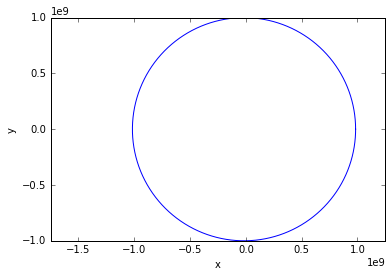

In [64]:
f = linspace(0.,2.*pi,1000.)
def earth(f,a,e):
    r = ( a * ( 1. -e**2 )) / (1. + e * cos(f) )
    return r

xpos = earth(f,1.0e9,0.0167086)*cos(f)
ypos = earth(f,1.0e9,0.0167086)*sin(f)

axis('equal')

plot (xpos,ypos)
xlabel("x")
ylabel("y")

        x                 y         ...        vye              t      
----------------- ----------------- ... ----------------- -------------
         7.48e+13         1.496e+13 ... 1.42625965378e+13           0.0
7.47527027016e+13 1.49599999998e+13 ... 1.42625965378e+13 31531.5315315
 7.4705405401e+13 1.49599999991e+13 ... 1.42625965378e+13 63063.0630631
7.46581080981e+13  1.4959999998e+13 ... 1.42625965378e+13 94594.5945946
 7.4610810793e+13 1.49599999964e+13 ... 1.42625965378e+13 126126.126126
7.45635134857e+13 1.49599999944e+13 ... 1.42625965378e+13 157657.657658
7.45162161761e+13  1.4959999992e+13 ... 1.42625965378e+13 189189.189189
7.44689188643e+13 1.49599999891e+13 ... 1.42625965378e+13 220720.720721
7.44216215503e+13 1.49599999857e+13 ... 1.42625965378e+13 252252.252252
 7.4374324234e+13 1.49599999819e+13 ... 1.42625965378e+13 283783.783784
              ...               ... ...               ...           ...
2.80211237531e+13 1.49594668017e+13 ... 1.42625965378e+13 311846

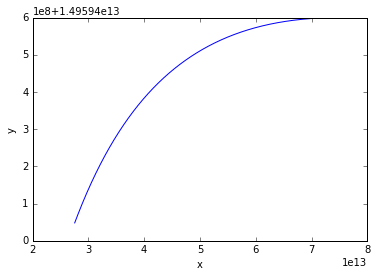

In [65]:
# More defined constants!
G = 6.67e-8
M = 1.989e33
mass_d = .1*mass_s #dwarf is .1 solar mass
mass_s = 1.988e30

#setting up Euler's method
def the_force(vec):
    
    #unpack our variables
    xs = vec[0]
    ys = vec[1]
    vxs = vec[2]
    vys = vec[3]
    
    xrd = vec[4]
    yrd = vec[5]
    vxrd = vec[6]
    vyrd = vec[7]
    
    xe = vec[8]
    ye = vec[9]
    vxe = vec[10]
    vye = vec[11]
    
    #relating radi to different positions (This is where we had the most problem. I believe that this is where our whole
    #program went wrong becase we are not getting any error messages but the numbers in our graph are not changing)
    rs = sqrt( (xrd+xs)**2 + (xrd+ys)**2 )
    rrd = sqrt( (xrd+xs)**2 + (xrd+ys)**2 )
    re1 = sqrt( (xs-xe)**2 + (ys-ye)**2 ) 
    re2 = sqrt( (xrd-xe)**2 + (yrd-ye)**2)
    
    #velocities/constucted derivatives 
    
    #Sun
    dxdts = vxs
    dydts = vys
    dvxdts = (-G*mass_d*(xs))/(rs**3)
    dvydts = (-G*mass_d*(ys))/(rs**3)
    
    #Dwarf
    dxdtd = vxrd
    dydtd = vyrd
    dvxdtd = (-G*mass_s*xrd)/(rrd**3)
    dvydtd = (-G*mass_s*yrd)/(rrd**3)
    
    #earth
    dxdte = vxe
    dydte = vye
    dvxdte = -G*((mass_s*xe/re1**3)+(mass_d*(xrd+xe)/re2**3))
    dvydte = -G*((mass_s*ye/re1**3)+(mass_d*(yrd+ye)/re2**3))
    
    #putting all our derivatives into and array
    #that can then be usable throught the rest of the code.
    derivarray = array([dxdts,dydts,dvxdts,dvydts,dxdtd,dydtd,dvxdtd,dvydtd,dxdte,dydte,dvxdte,dvydte])
    
    return derivarray

#number of time we want the code to be evaluated, used when using linspace.
nstep = 1000

#initial conditions
xr0 = 7.48e13
yr0 = 1.496e13
vxr0 = -1.5e6
vyr0 = 0

xs0 = 0
ys0 = 0 
vxs0 = 0
vys0 = 0

xe0 = 1.5e13
ye0 = 0
vxe0 = 0
vye0 = sqrt(G*M*((2/1.5e13)/(1/1.15e13)))


initial_values = array([xr0,yr0,vxr0,vyr0,xs0,ys0,vxs0,vys0,xe0,ye0,vxe0,vye0])

#this is where were tell our program how many times
#to run over a certain value and then stop, as well 
#as the time incriment, dt.
times = linspace(0,3.15e7,nstep) #integrate over ten years, in sec
dt = times[1]-times[0]

#this is our black array to fill our solution with.
result = zeros((len(times),len(initial_values)))

#incrementing through the times to advance the solution
the_array = initial_values.copy()
for i,t in enumerate(times):
    
    #filling in the result array
    result[i] = the_array
    
    # advancing our solution..
    k1 = dt*the_force(the_array)
    k2 = dt*the_force(the_array + k1/2.0)
    k3 = dt*the_force(the_array + k2/2.0)
    k4 = dt*the_force(the_array + k3)
    
    the_array += k1/6. +k2/3. + k3/3. + k4/6.

#putting our solution into a table
colums = ['x','y','vx','vy','xs','ys','vxs','vys','xe','ye','vxe','vye']
sol = Table(result,names=colums)

sol['t'] = times

print sol 
plot(sol['x'],sol['y'])
#plot(sol['xs'],sol['ys'])
#plot(sol['xe'],sol['ye'])
xlabel("x")
ylabel("y")

For the second part of our project, we wanted to make a simulation for a red dwarf falling through the solar system. Given some initial values at which a red dwarf of 0.1 solar mass enters the solar system, we set up an integration of the Earth’s orbital motion around the sun. The sun, Earth, and red dwarf all have gravitational attractions. This system of twelve variables includes the positions and velocities components of the Sun, Earth, and red dwarf. We once again apply our Runge Kutta approach to integrate the motion over ten years. However, we ran into problems calculating our derivatives. We believe this has to do with a
miscalculated radii. When running our Runge Kutta method we were able to complete the integration without any error messages, but our graph was not what we expected. We expected orbits moving relative to each other, but our plot returned straight lines.  
